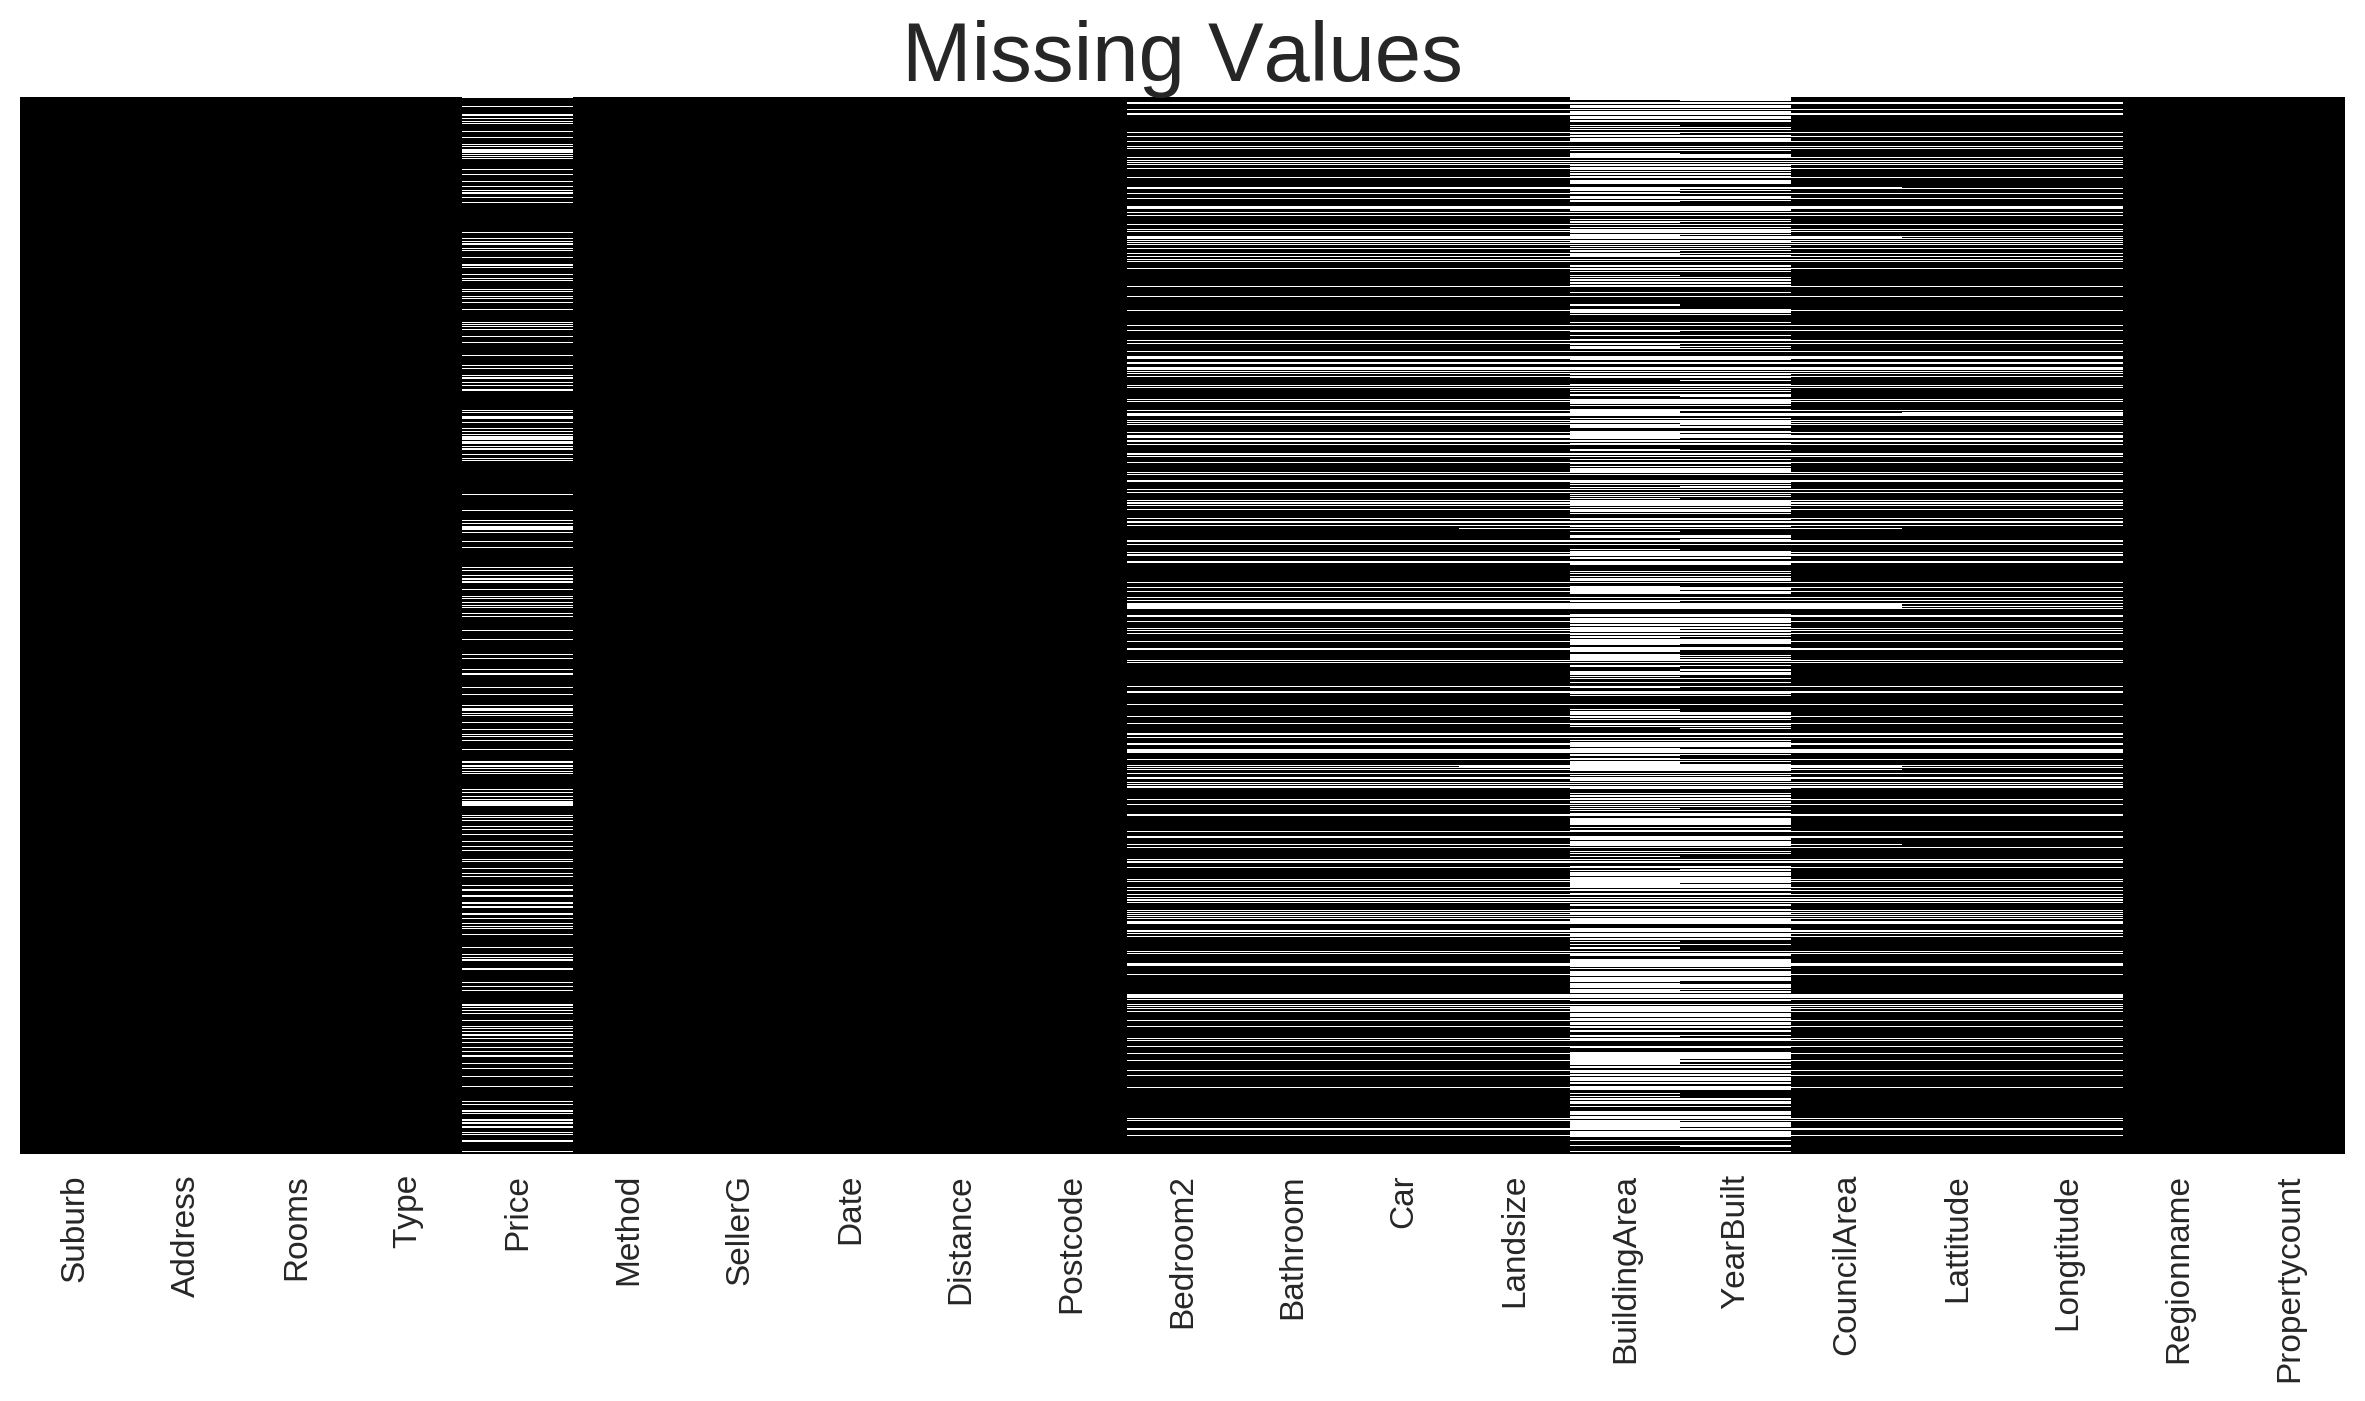

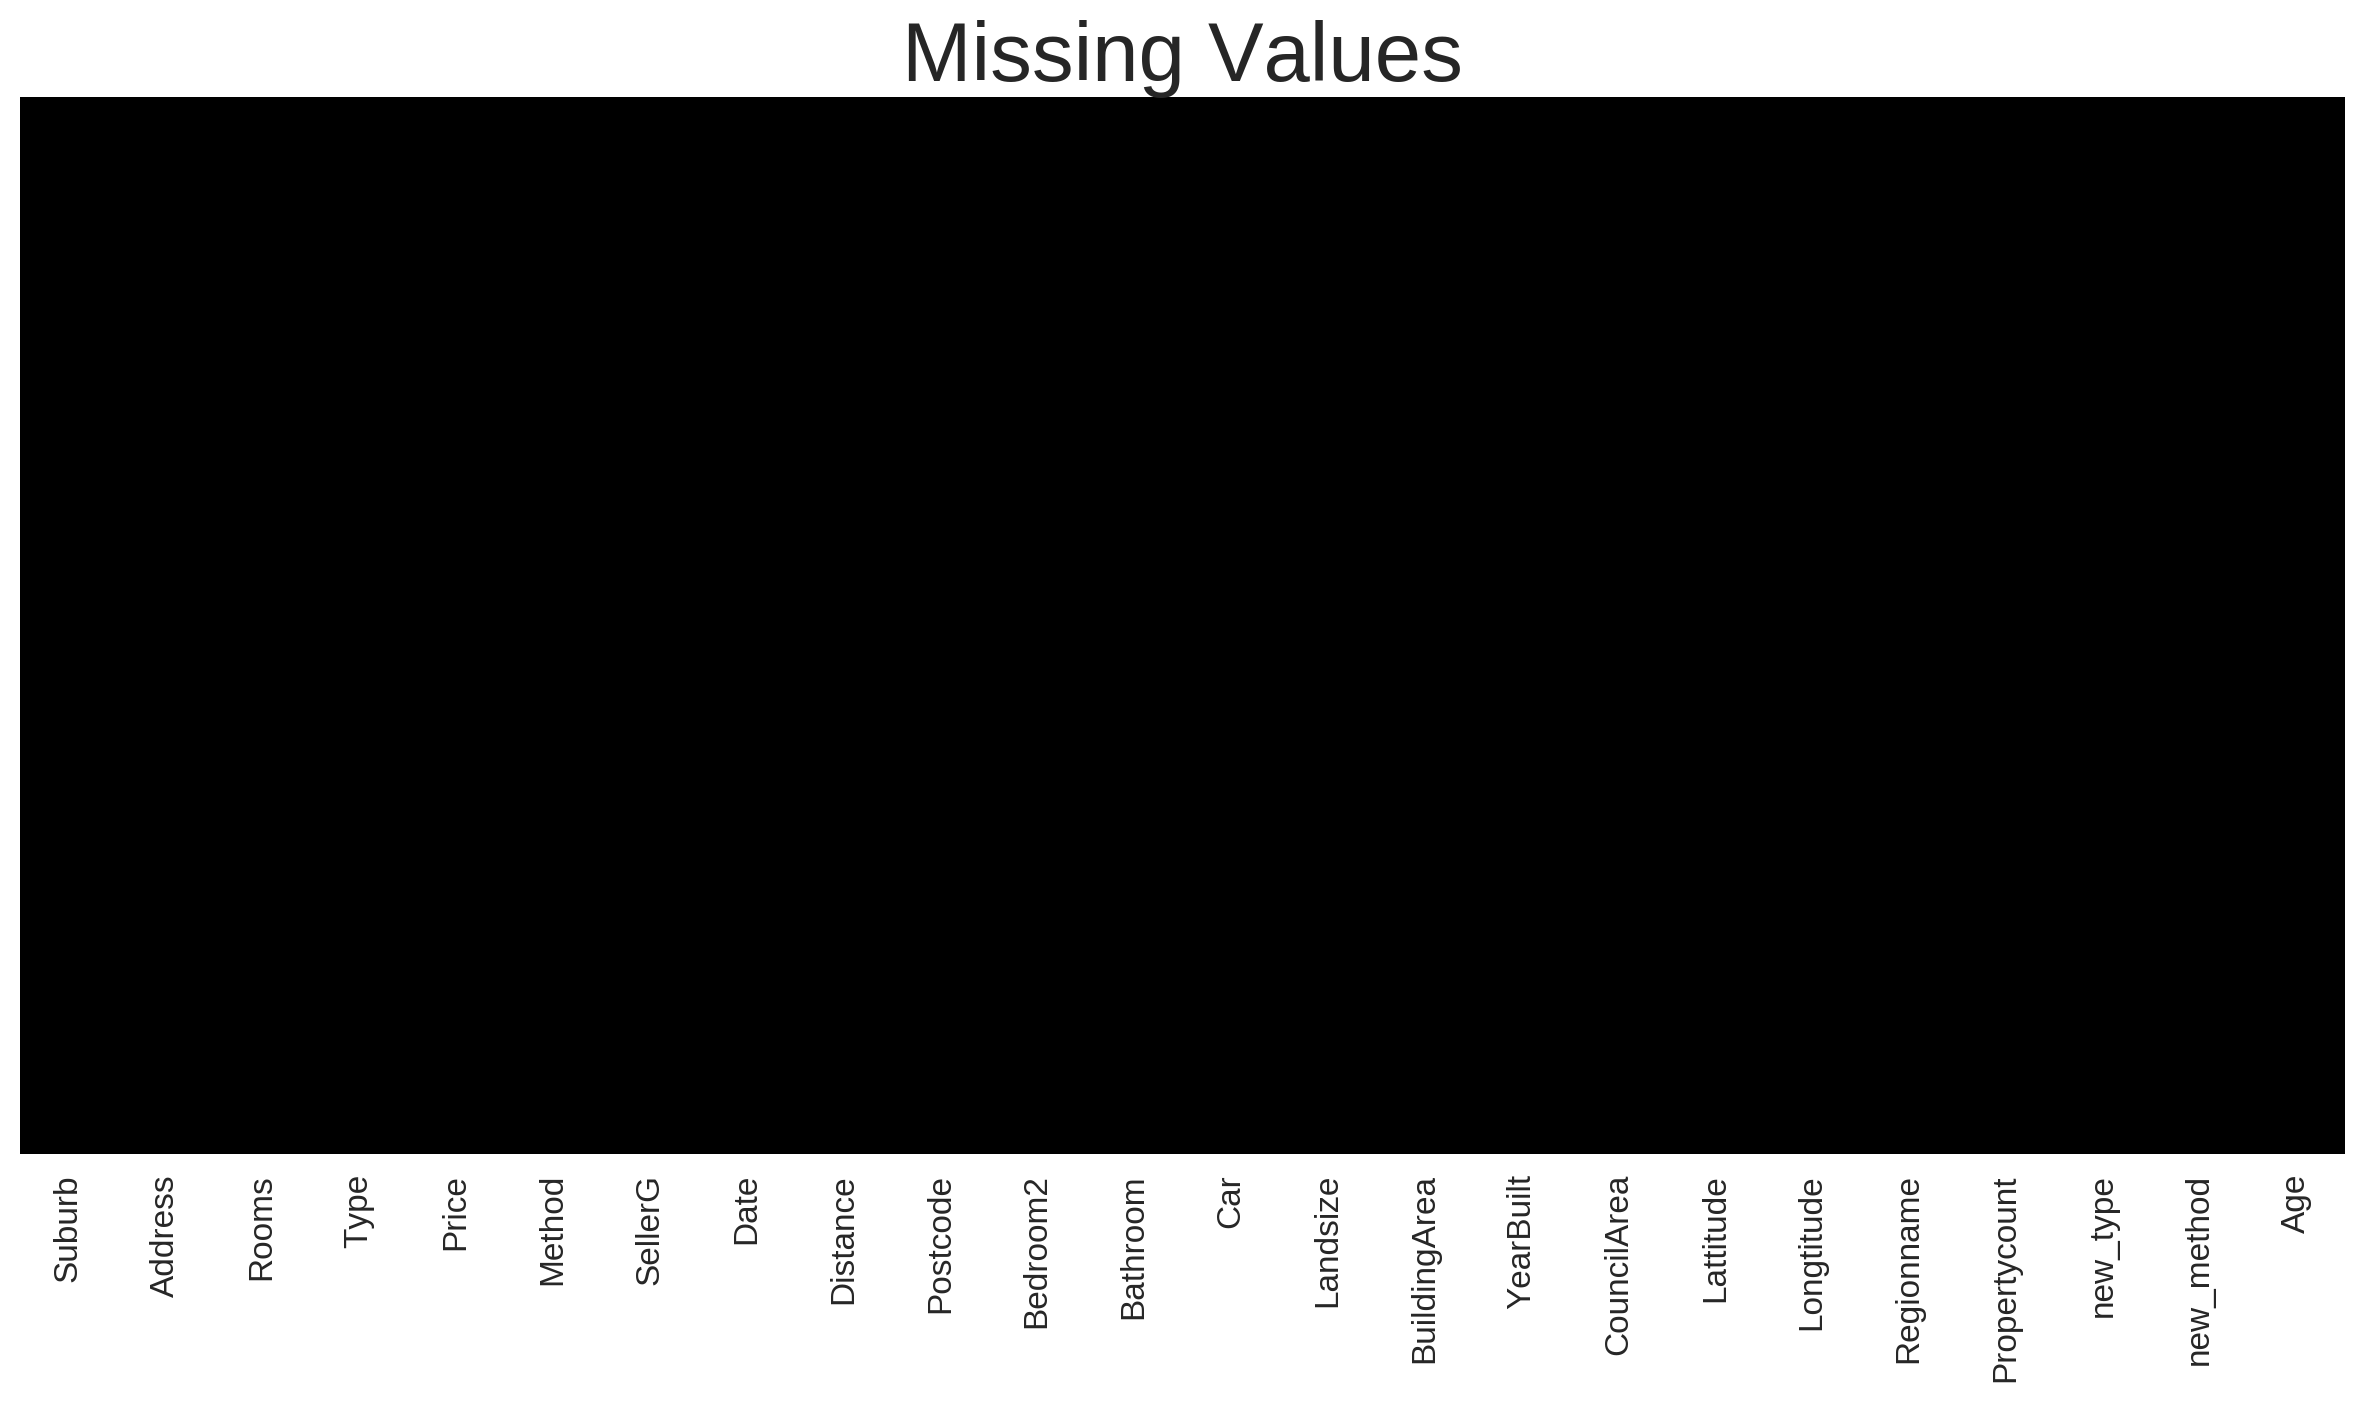

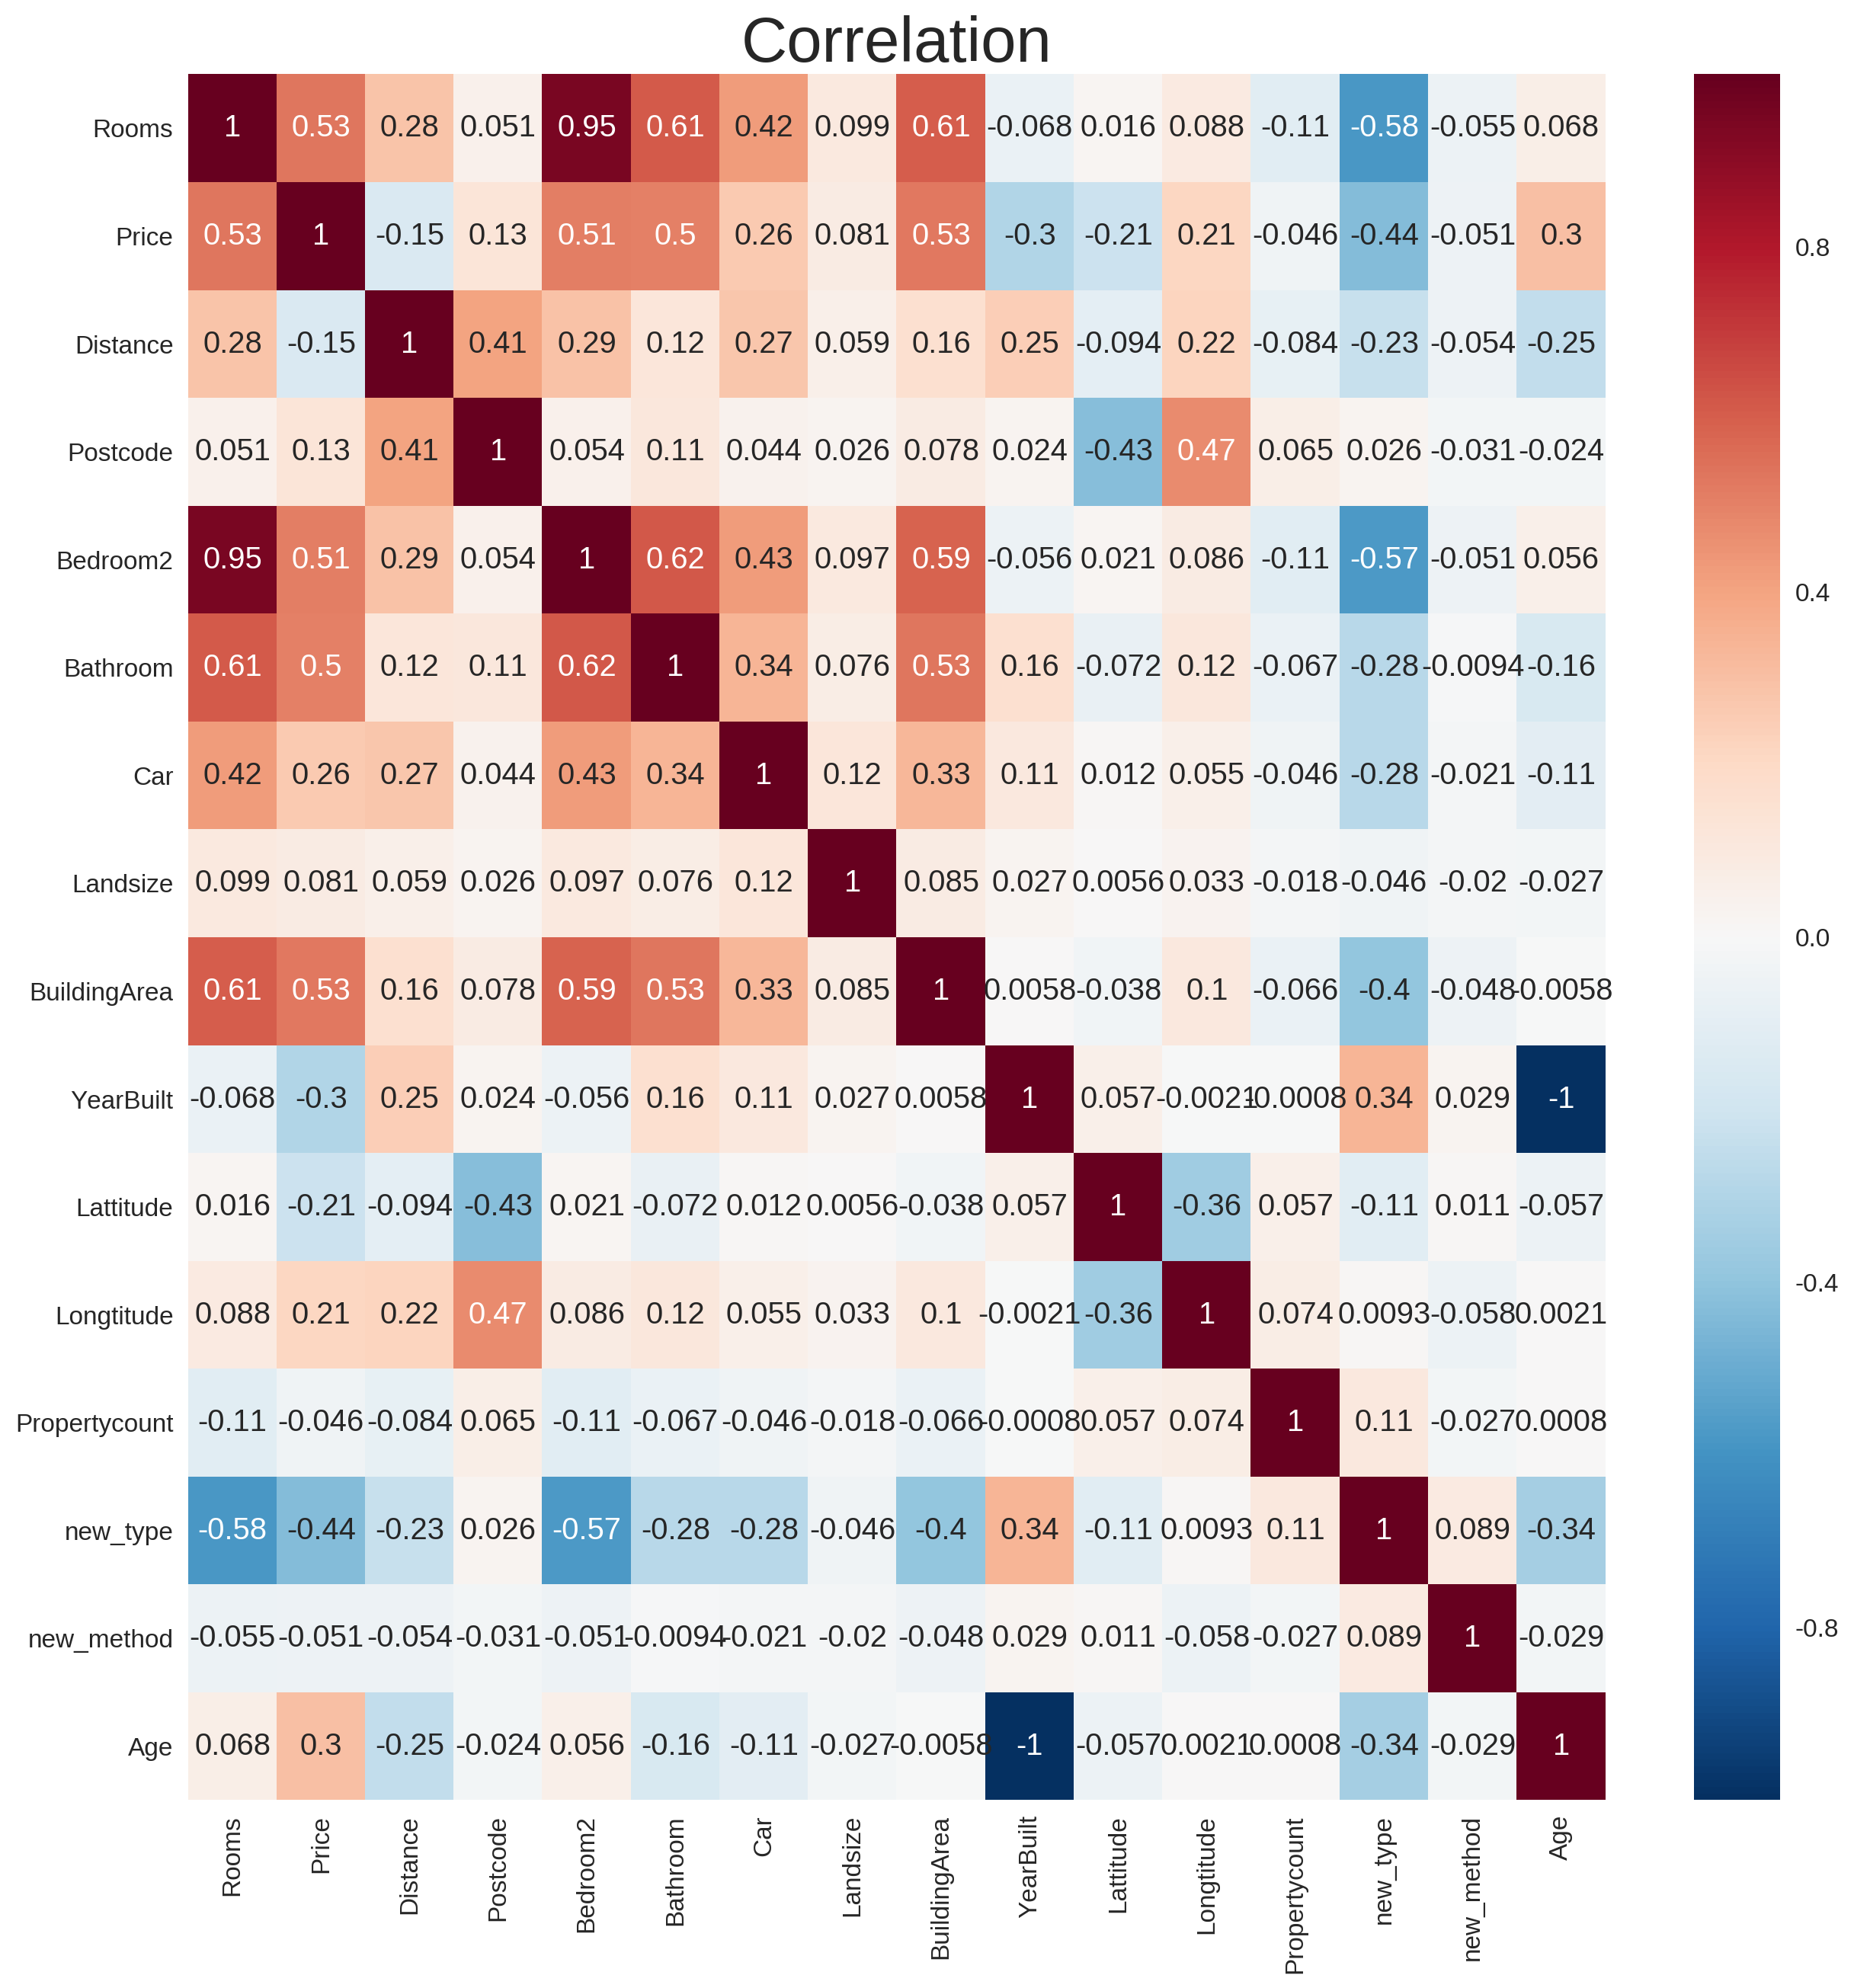

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


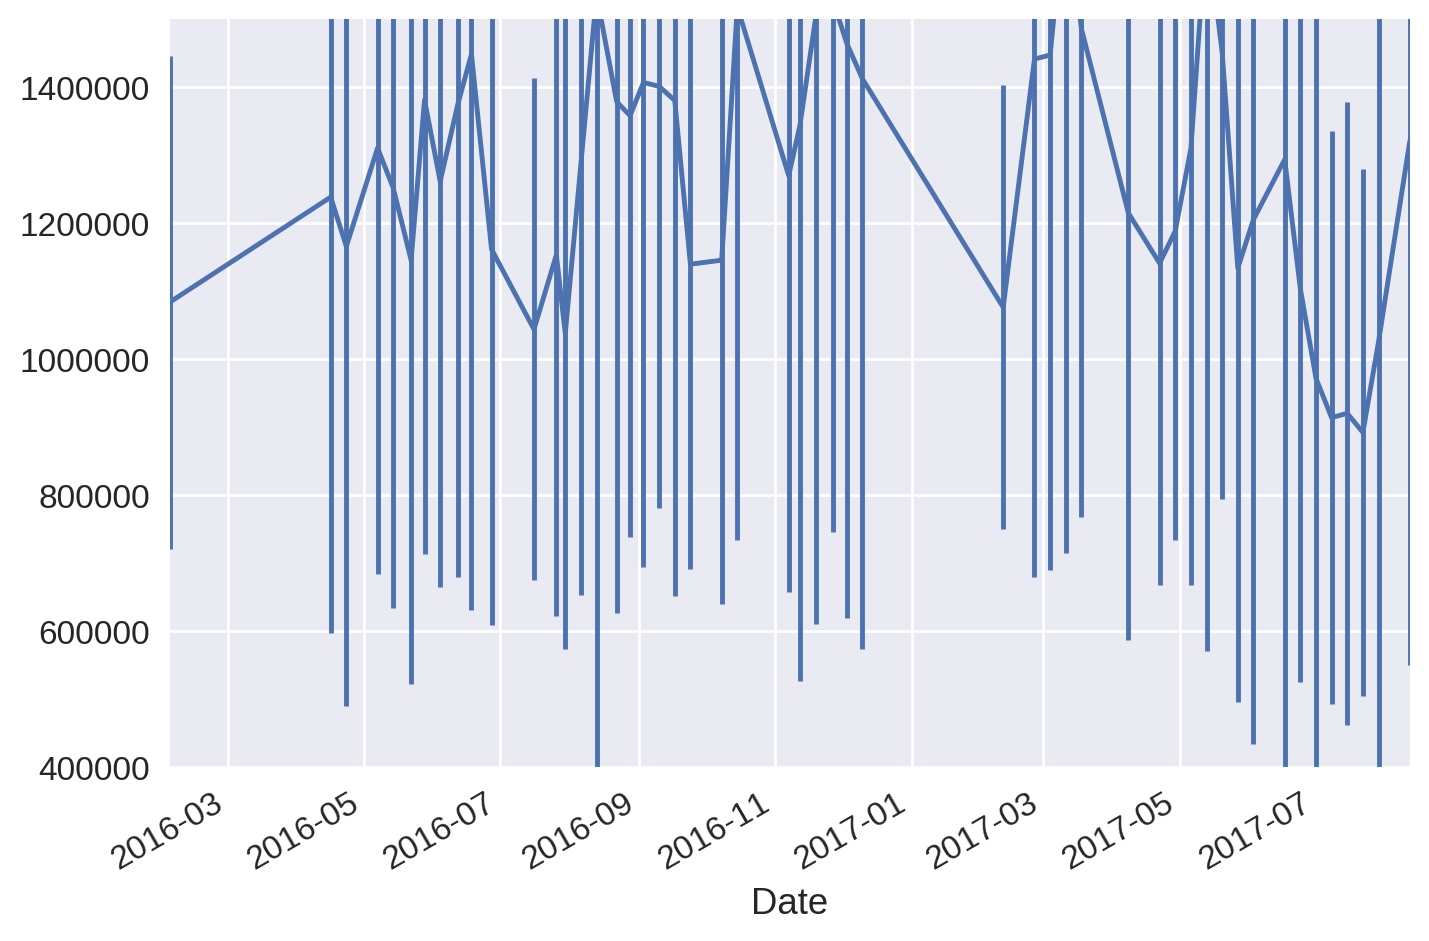

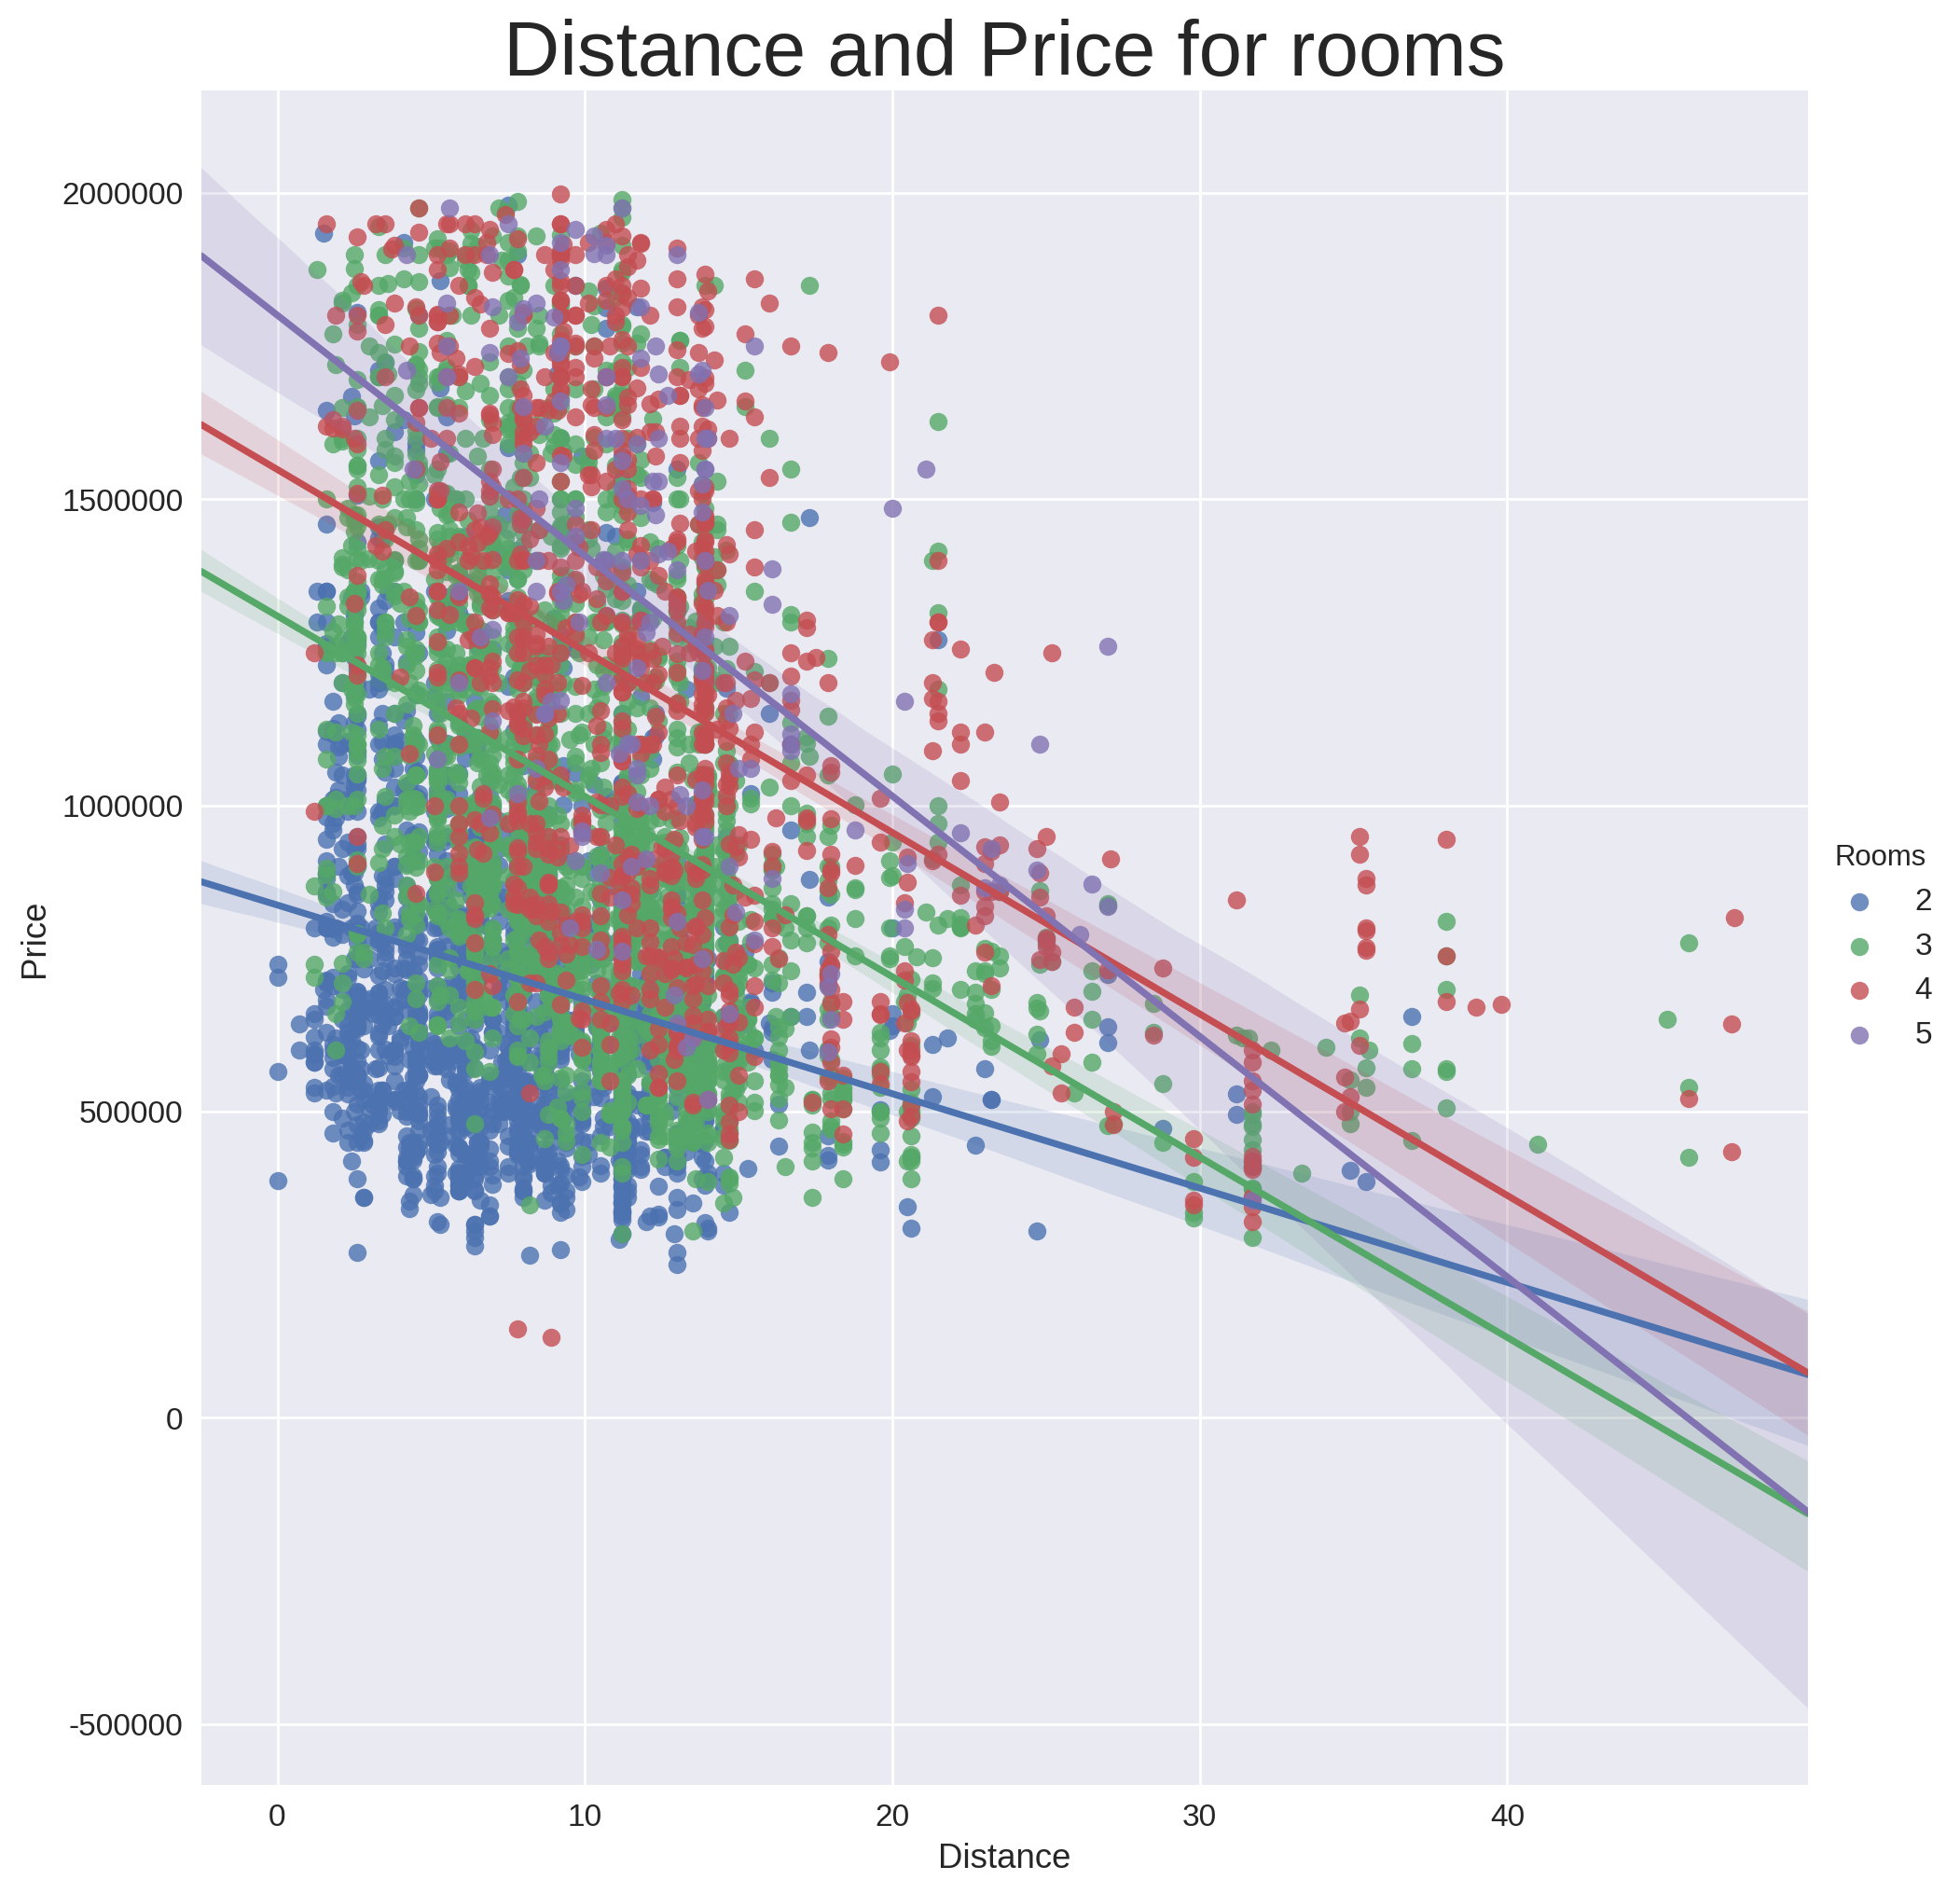

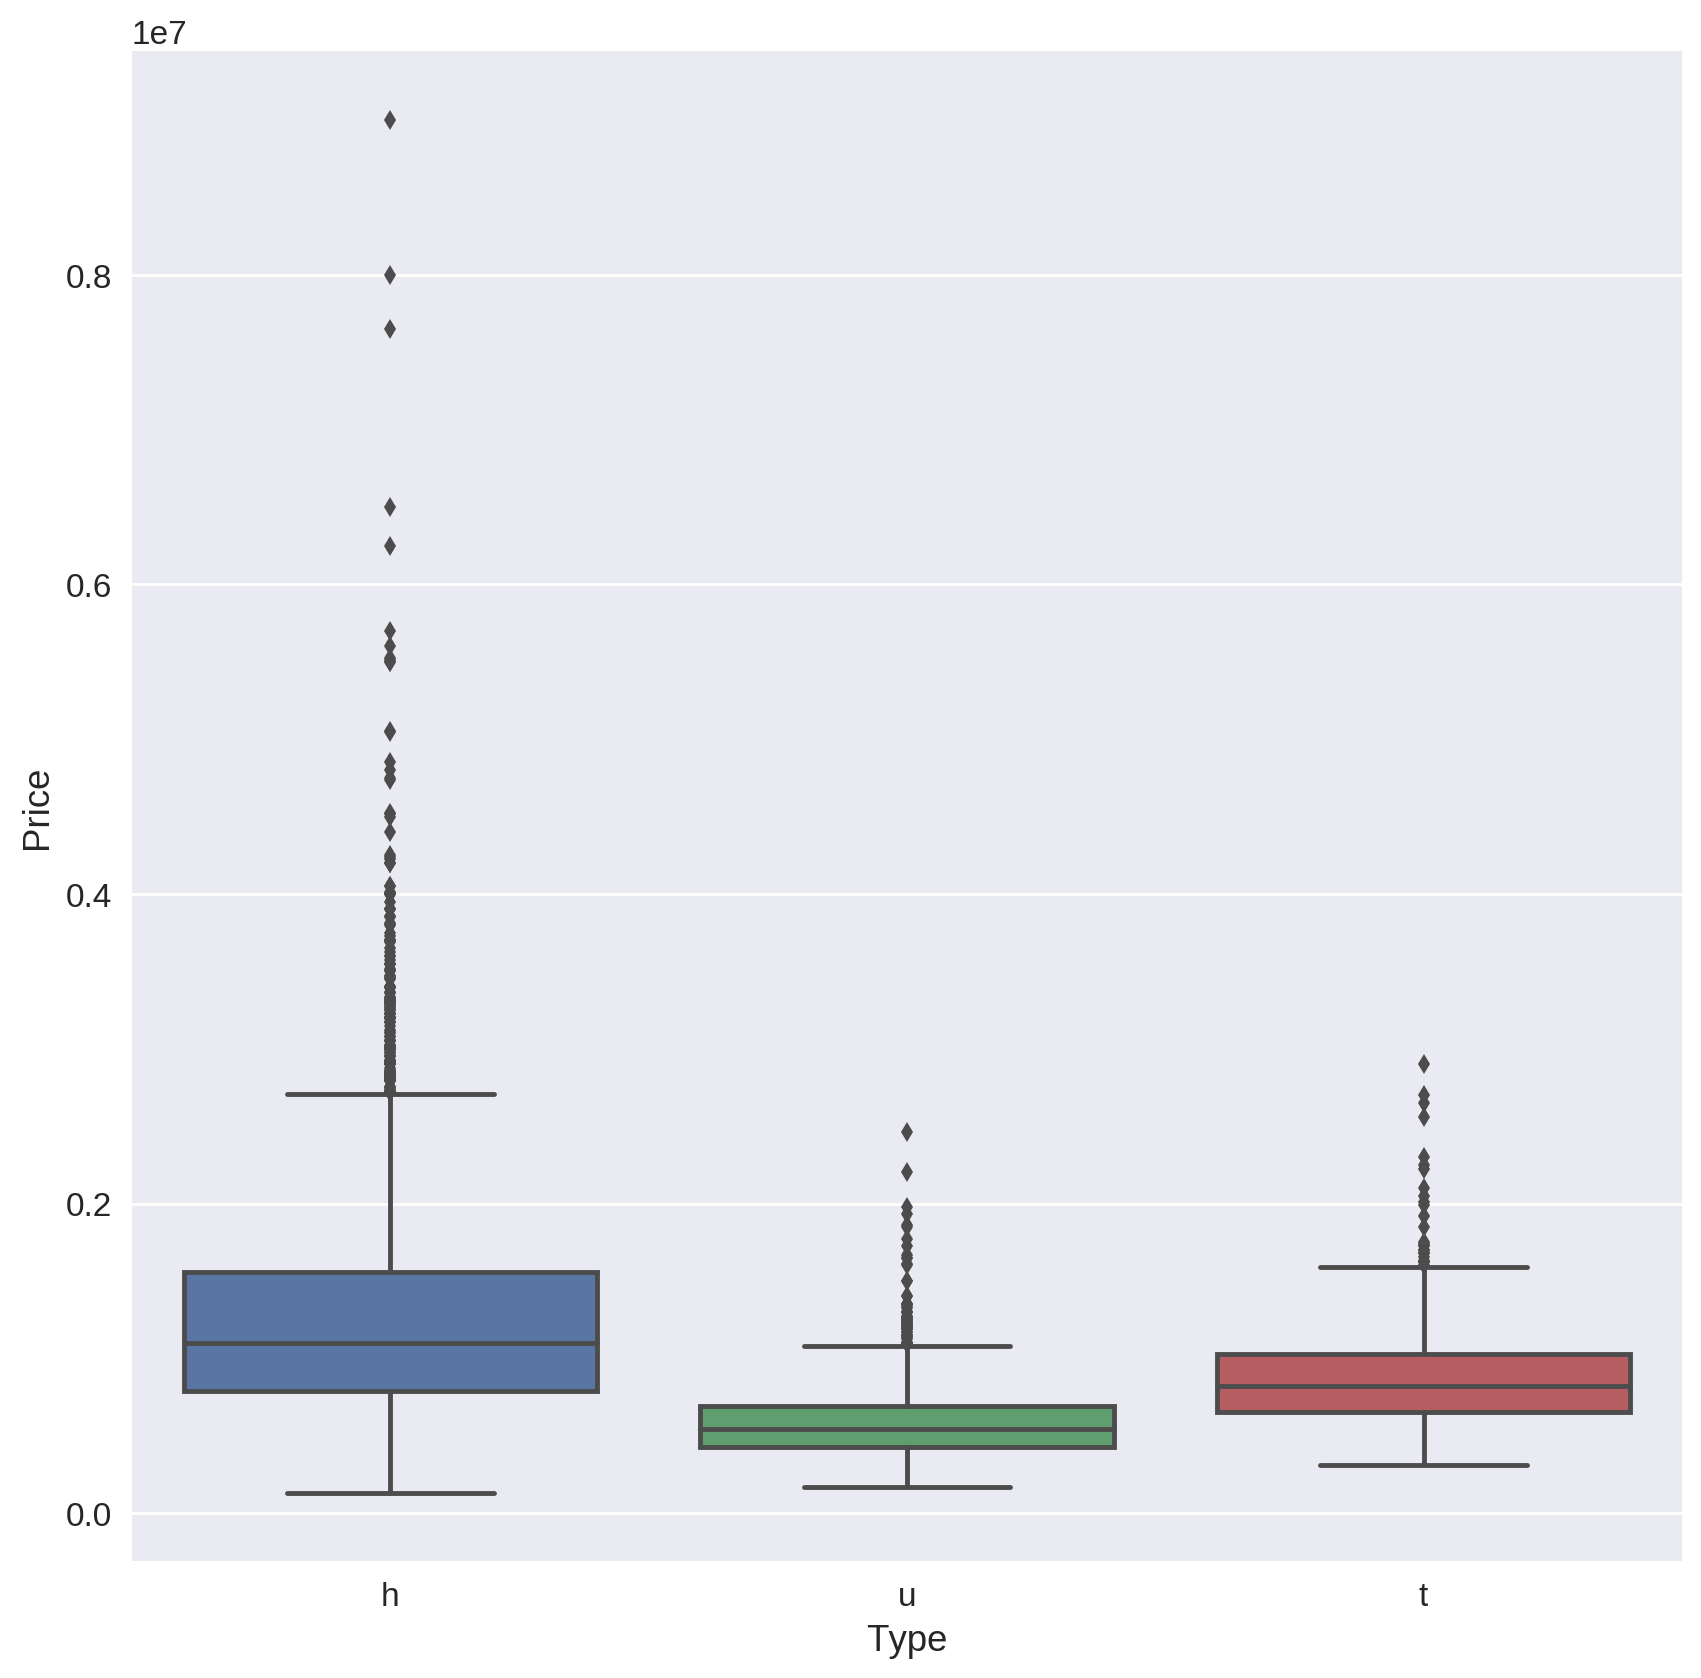

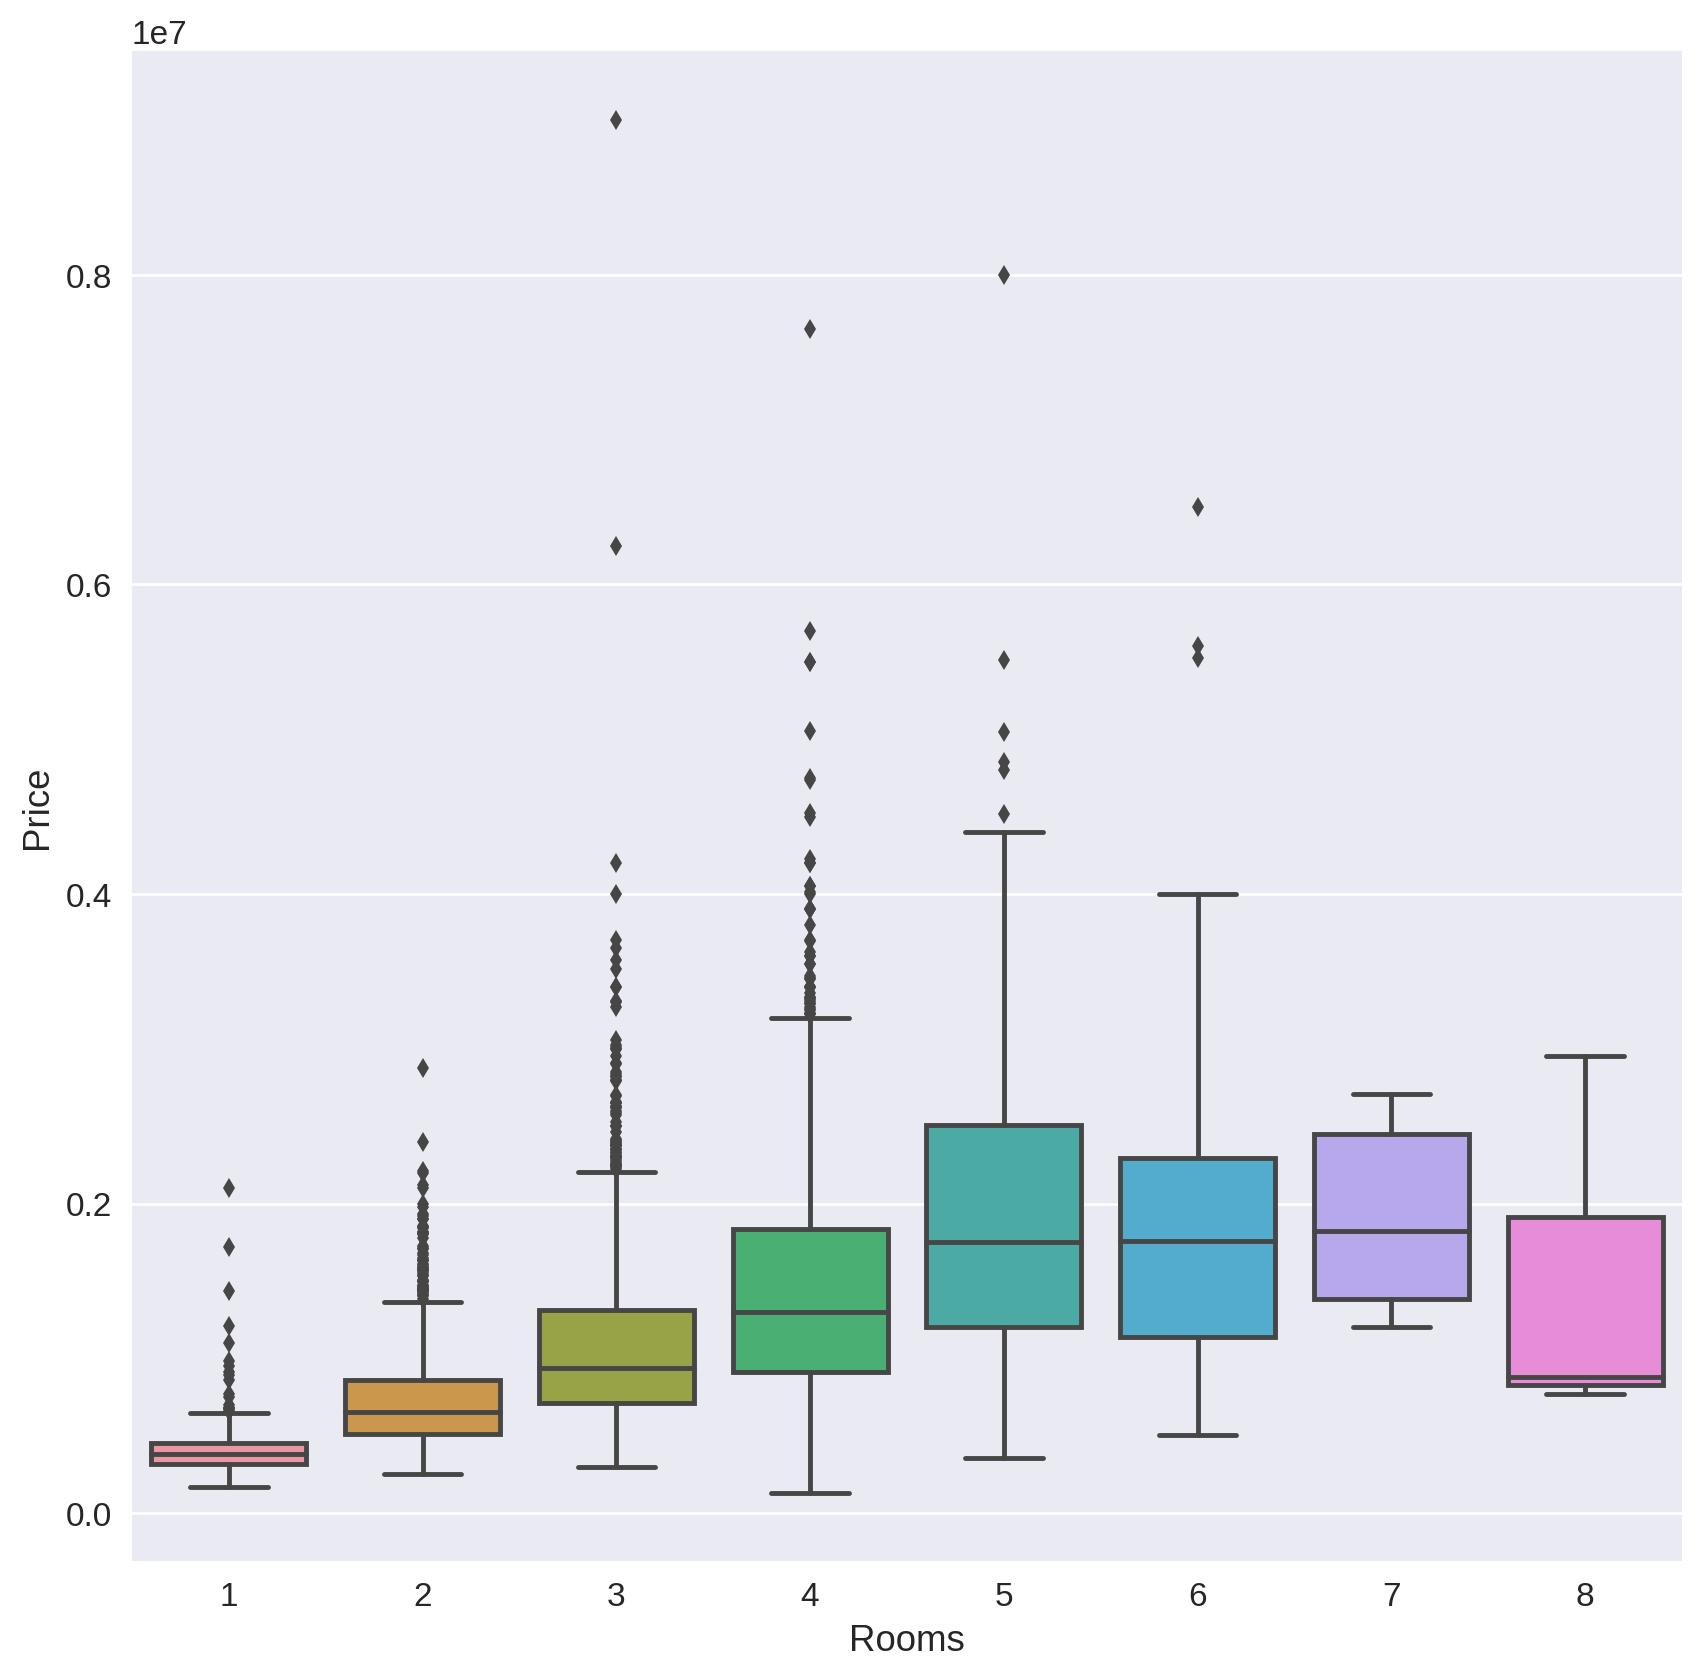

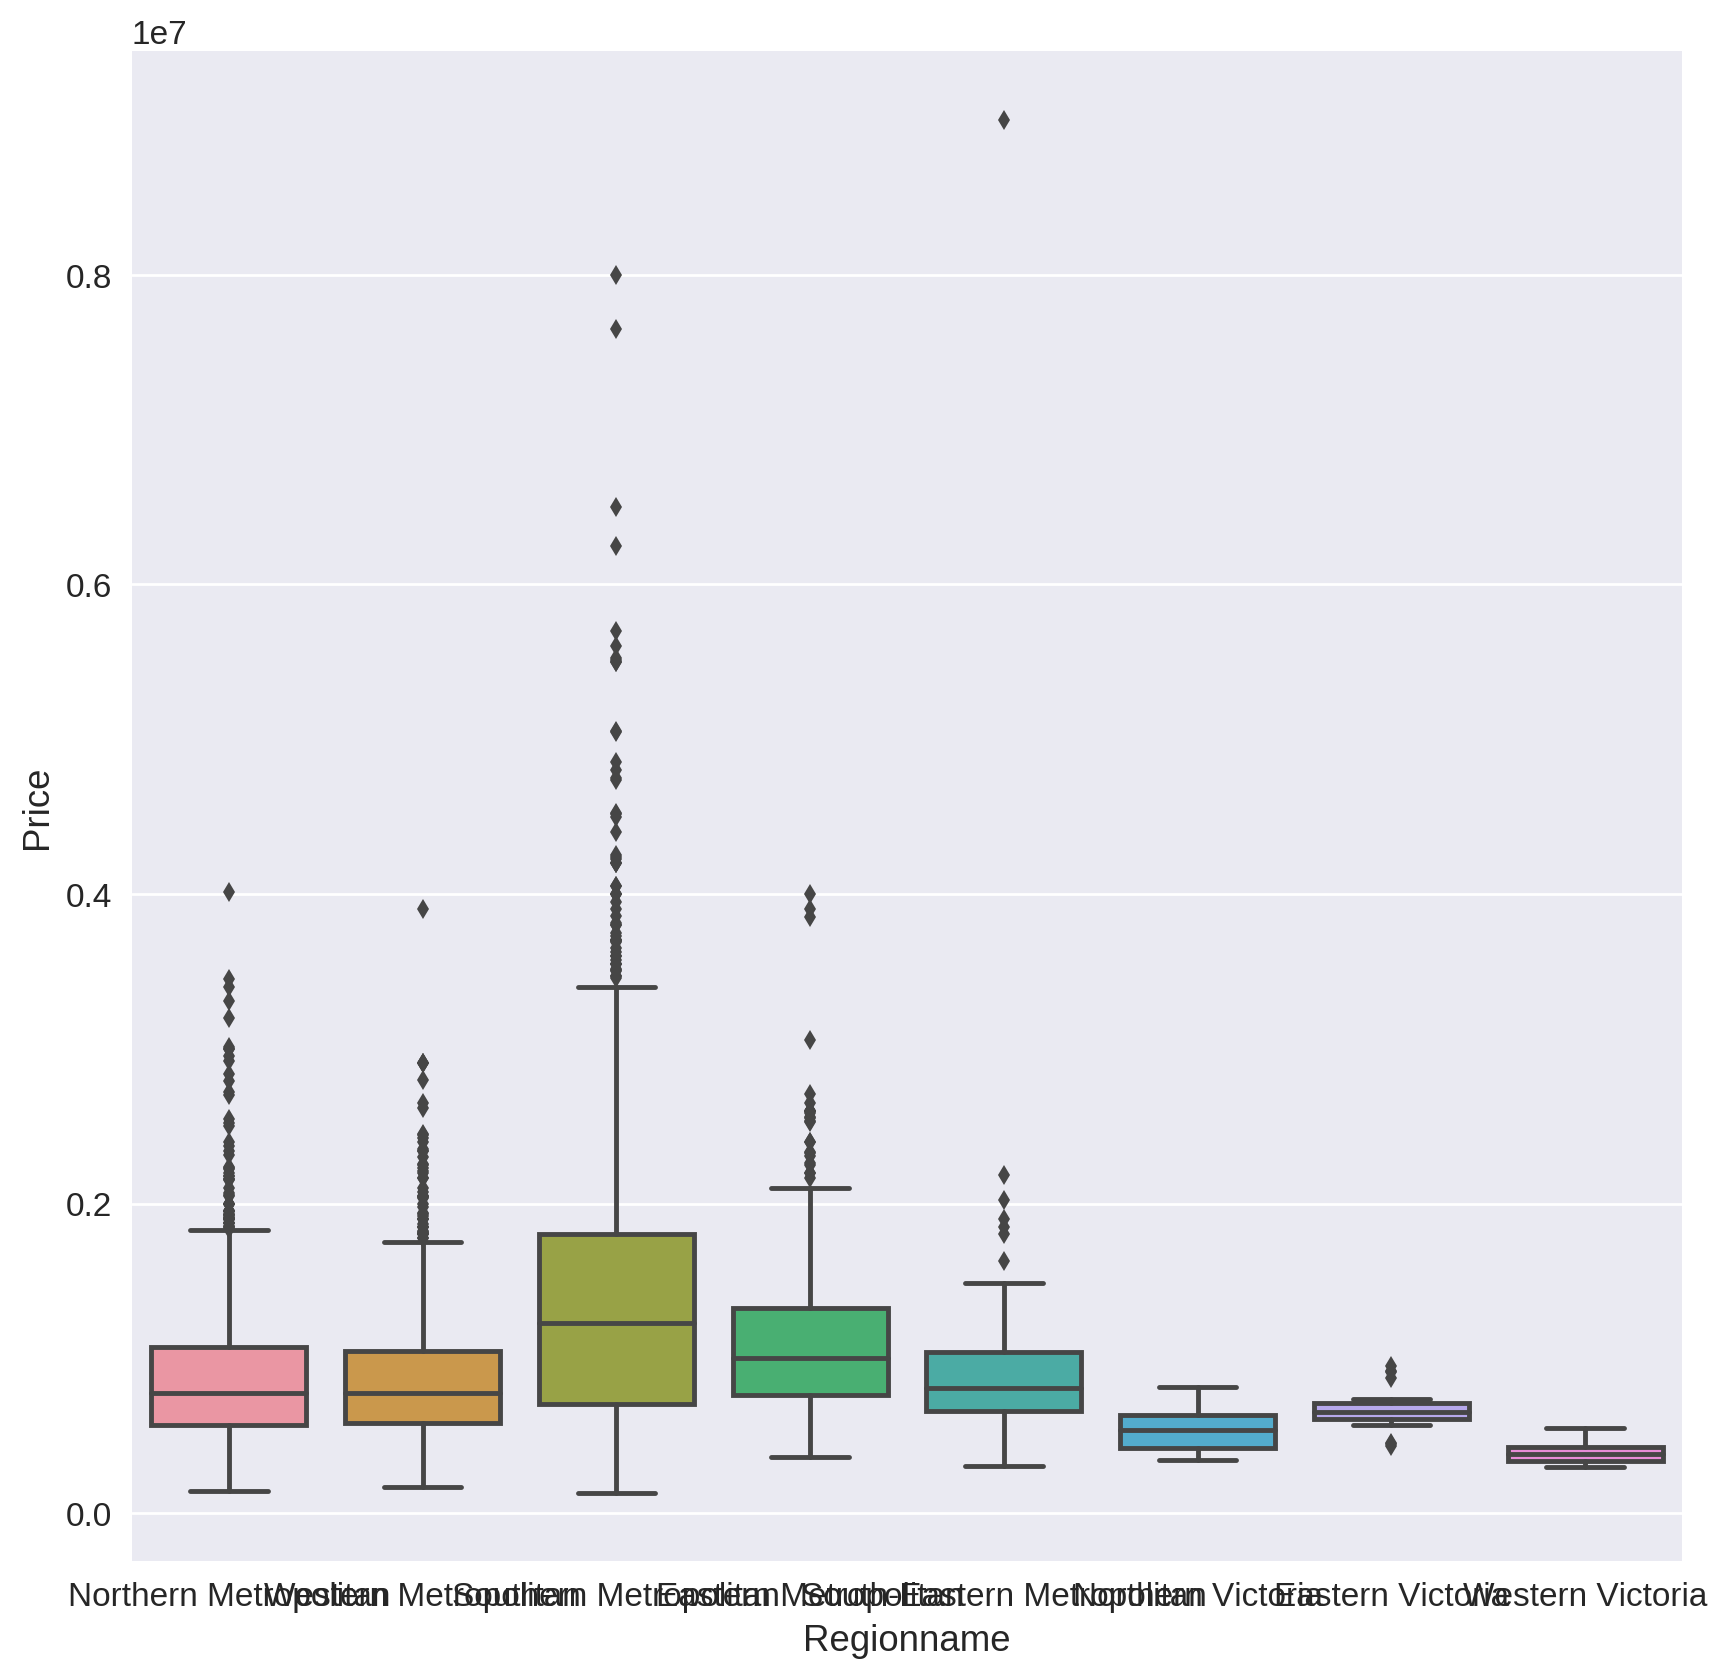

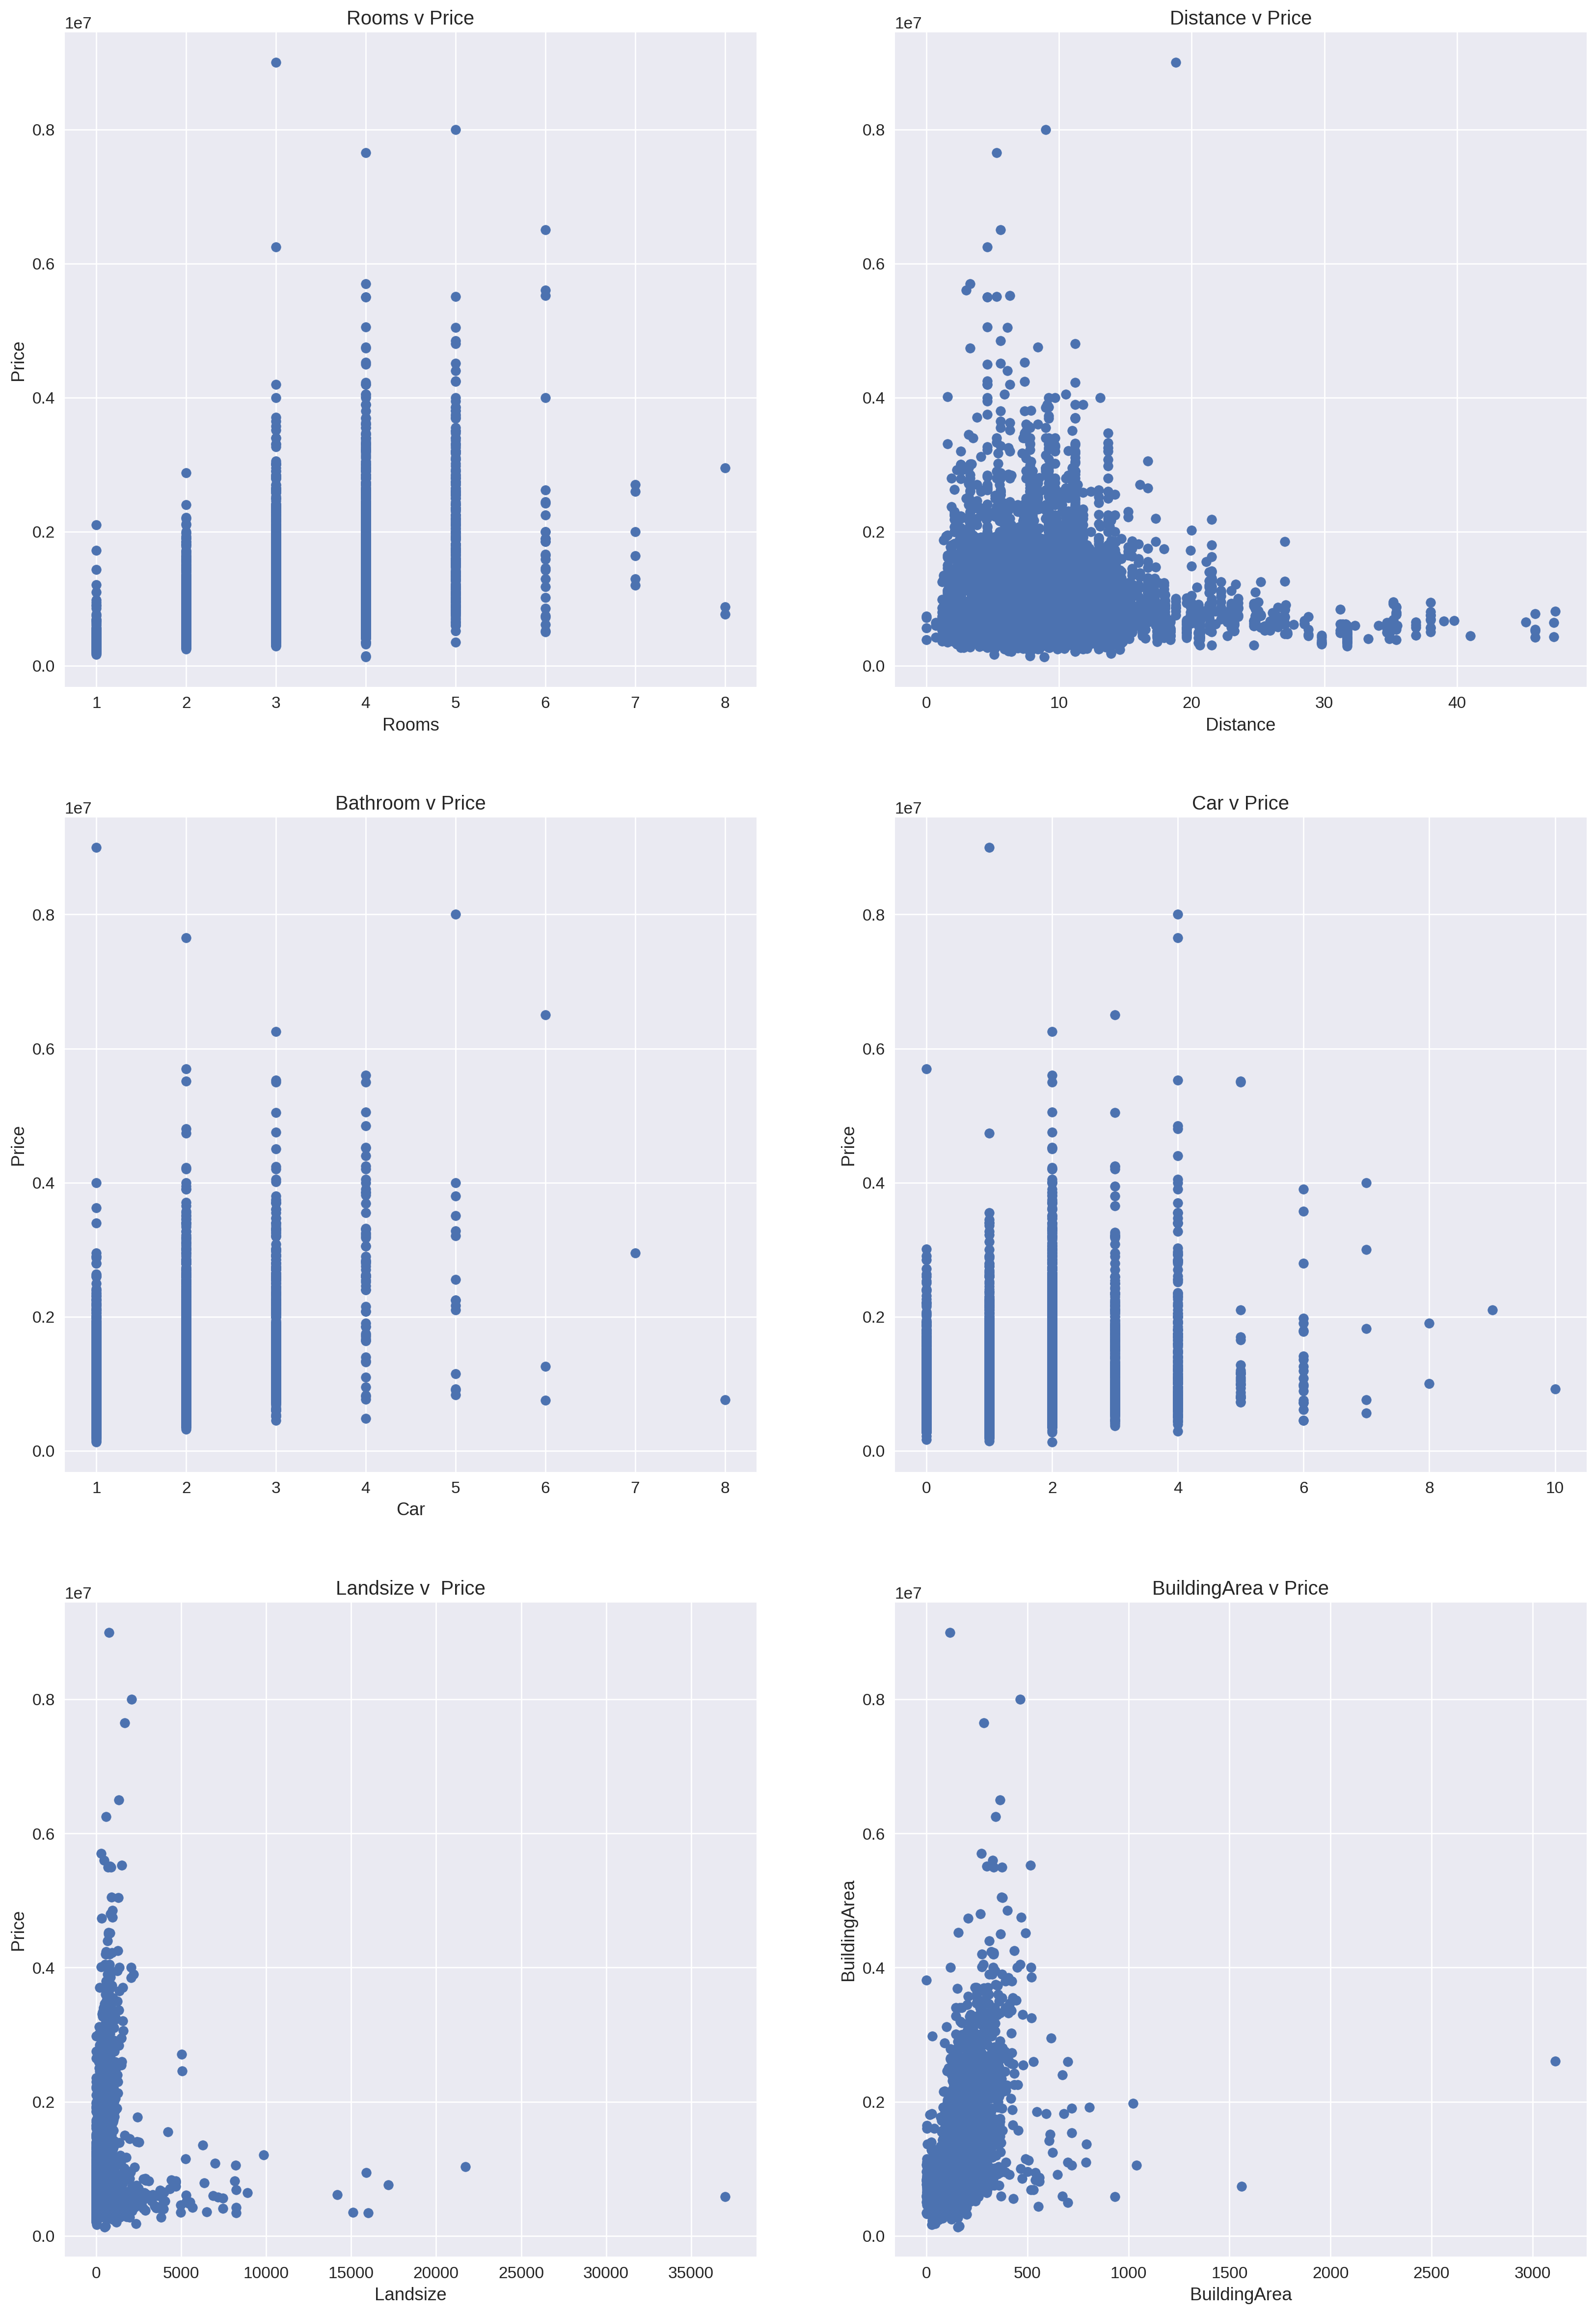

MAE: 269337.152642
MSE: 262109061426.0
RMSE:$ 511965.879162 is away from the actual value.
Coefficient :                 Coefficients
Rooms          1.098500e+05
new_type      -1.436054e+05
new_method    -7.185445e+03
Distance      -4.081236e+04
Bedroom2      -4.593632e+03
Bathroom       1.987272e+05
Car            5.652835e+04
Landsize       1.571432e+01
BuildingArea   2.176610e+03
Age            3.211570e+03
Lattitude     -1.550600e+06
Longtitude     1.001486e+06
Propertycount -4.859952e-02
MAE: 320200.956611
MSE: 295052658617.0
RMSE:$ 543187.498583 is away from the actual value.
Coefficient :                 Coefficients
Rooms          6.929868e+04
new_type      -8.356301e-07
new_method    -7.822066e+03
Distance      -5.170657e+04
Bedroom2       1.191073e+04
Bathroom       2.260875e+05
Car            3.517824e+04
Landsize       3.427470e+02
BuildingArea   2.153337e+03
Age            3.172408e+03
Lattitude     -1.904171e+06
Longtitude     9.865485e+05
Propertycount  1.044163e+00


In [26]:
## Daeun Go
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

################################################################################
##Data loading##################################################################
################################################################################
melbourne_data = pd.read_csv("/home/dockeruser/df/Melbourne_housing_extra_data-18-08-2017.csv")
# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(melbourne_data.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.title('Missing Values', fontsize=30)
plt.show()

filtered_melbourne_data = melbourne_data.dropna(axis=0)
melbourne_df = pd.DataFrame(filtered_melbourne_data)
melbourne_df

le = preprocessing.LabelEncoder()
le.fit(list(melbourne_df["Type"]))
new_type = le.transform(list(melbourne_df["Type"]))

melbourne_df["new_type"] = new_type

le.fit(list(melbourne_df["Method"]))
new_method = le.transform(list(melbourne_df["Method"]))
melbourne_df["new_method"] = new_method
melbourne_df['Age'] = 2017 - melbourne_df['YearBuilt']

#print(df2)
###############################################################################
## DATA Exploration############################################################
###############################################################################


# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(melbourne_df.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.title('Missing Values', fontsize=30)
plt.show()
# Check number of missing values
melbourne_df.isnull().sum()
#Correlation for each variables
fig, ax = plt.subplots(figsize=(15,15)) 
sns.plt.title('Correlation', fontsize=30)
sns.heatmap(melbourne_df.corr(), annot=True)
#1st EDA by Type
melbourne_df2 = melbourne_df[['Rooms', 'Type','Distance', 'Car','Price', 'Landsize', 'Bedroom2','Bathroom','BuildingArea','Age','Propertycount','Regionname']]

sns.pairplot(melbourne_df2, hue='Type')
plt.title('EDA by Type', fontsize=30)
plt.show()
#2nd EDA by Regionname
sns.pairplot(melbourne_df2, hue='Regionname')
plt.title('EDA by Region', fontsize=30)
plt.show()

#Time series prices for checking any surprising event
melbourne_df["Date"] = pd.to_datetime(melbourne_df["Date"],dayfirst=True)
len(melbourne_df["Date"].unique())/4 ##4Q divided
var = melbourne_df[melbourne_df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = melbourne_df[melbourne_df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = melbourne_df[melbourne_df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))
#Price distribution by region, type, and number of rooms
sns.lmplot("Distance","Price",melbourne_df[(melbourne_df["Rooms"]<=5) & 
                                         (melbourne_df["Rooms"]> 1) & 
                                        (melbourne_df["Price"]< 2000000)
                                       ].dropna(),hue="Rooms", size=10)
sns.plt.title('Distance and Price for rooms', fontsize=30)

#Room and price
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='Type',y='Price',data=melbourne_df)
#Room and price
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='Rooms',y='Price',data=melbourne_df)
#Region and price
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='Regionname',y='Price',data=melbourne_df)

#Scatter plots
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')


plt.show()

## Descriptive Statistics
melbourne_df.describe()

## Linear Regression
# Create features variable 
X = melbourne_df[['Rooms','new_type', 'new_method', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'Age',
       'Lattitude', 'Longtitude', 'Propertycount']]

# Create target variable
y = melbourne_df['Price']
# split data into training and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# scatter plot
#plt.scatter(X_train, y_train, color="pink")
#plt.scatter(X_test, y_test, color="red")
#plt.scatter(X_test, y_pred, color="lightgreen")

#plt.plot(X_train, regressor.predict(X_train), color="blue")
#plt.show()
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:$',np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'is away from the actual value.')

cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
print('Coefficient : ',cdf)

###############################################################
subdf1 = melbourne_df[melbourne_df["new_type"]==0]
subdf2 = melbourne_df[melbourne_df["new_type"]==1]
subdf3 = melbourne_df[melbourne_df["new_type"]==2]

melbourne_predictors = ['Rooms','new_type', 'new_method', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'Age',
       'Lattitude', 'Longtitude', 'Propertycount']

sub1_predictors_df = subdf1[melbourne_predictors]
sub2_predictors_df = subdf2[melbourne_predictors]
sub3_predictors_df = subdf3[melbourne_predictors]


sub1_response_df = subdf1["Price"]
sub2_response_df = subdf2["Price"]
sub3_response_df = subdf3["Price"]


sub1_predictors_train, sub1_predictors_val, sub1_resp_train, sub1_resp_val = train_test_split(sub1_predictors_df, 
                                                                                              sub1_response_df, test_size = 0.2,
                                                                                              random_state = 0)

sub2_predictors_train, sub2_predictors_val, sub2_resp_train, sub2_resp_val = train_test_split(sub2_predictors_df, 
                                                                                              sub2_response_df, test_size = 0.2,
                                                                                              random_state = 0)

sub3_predictors_train, sub3_predictors_val, sub3_resp_train, sub3_resp_val = train_test_split(sub3_predictors_df, 
                                                                                              sub3_response_df, test_size = 0.2,
                                                                                              random_state = 0)



### Type 1 Linear regression: 
regressor1 = LinearRegression()
regressor1 = regressor1.fit(sub1_predictors_train, sub1_resp_train)

y_pred1 = regressor1.predict(sub1_predictors_val)

# scatter plot
#plt.scatter(X_train, y_train, color="pink")
#plt.scatter(X_test, y_test, color="red")
#plt.scatter(X_test, y_pred, color="lightgreen")

#plt.plot(X_train, regressor.predict(X_train), color="blue")
#plt.show()
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(sub1_resp_val,y_pred1))
print('MSE:',metrics.mean_squared_error(sub1_resp_val,y_pred1))
print('RMSE:$',np.sqrt(metrics.mean_squared_error(sub1_resp_val,y_pred1)),'is away from the actual value.')

cdf1 = pd.DataFrame(data = regressor1.coef_, index = melbourne_predictors, columns = ['Coefficients'])
print('Coefficient : ',cdf1)




